In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train_original=train.copy()
test_original=test.copy()

In [3]:
# variable identification
train.shape, test.shape

((891, 12), (418, 11))

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.dtypes
#Survived are Pclass (ordinal) categorical data

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train.info()
#missing data in age and cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.set_index('PassengerId', inplace=True)
test.set_index('PassengerId', inplace=True)

In [8]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
train=train[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked','Survived']]

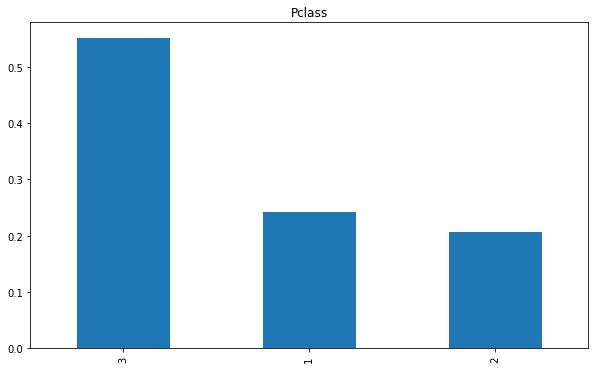

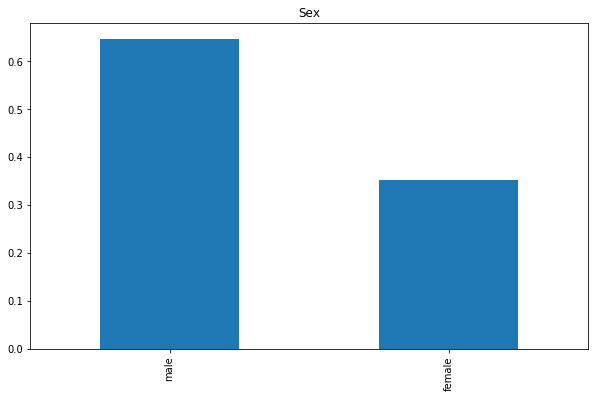

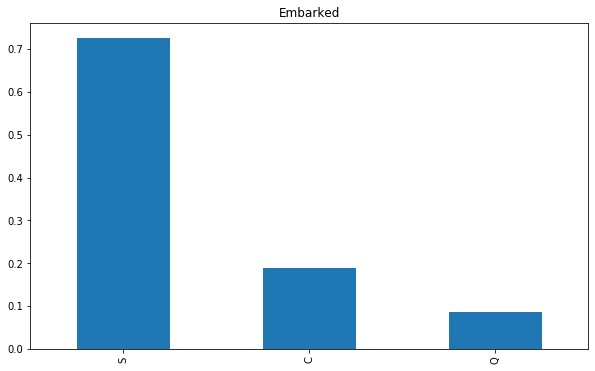

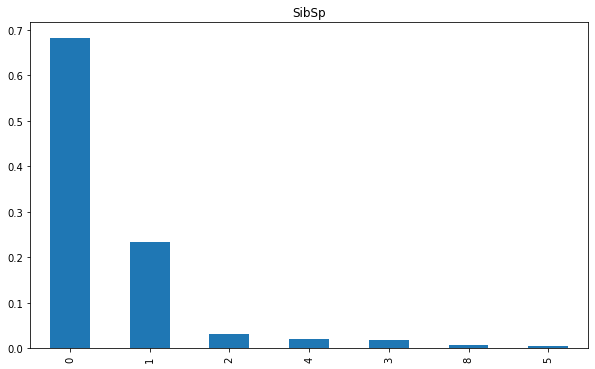

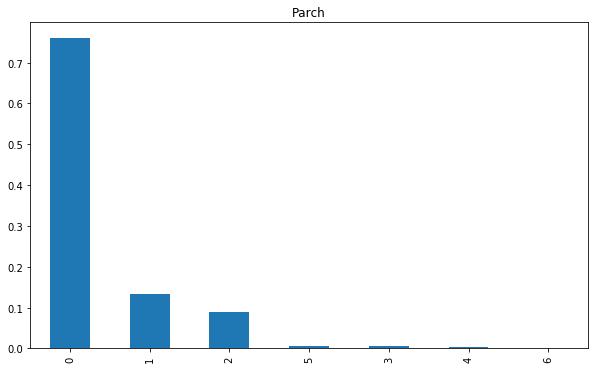

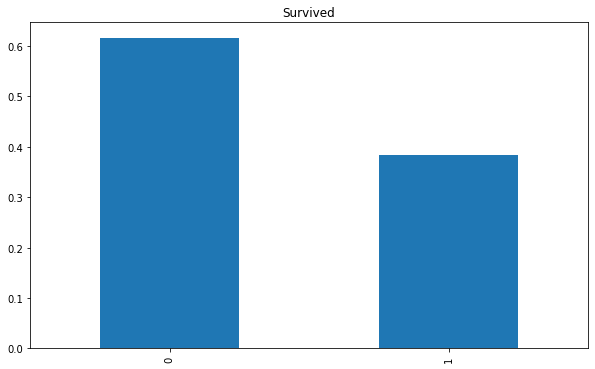

In [11]:
def barplot(x):
    X=x.value_counts(normalize=True).plot(kind='bar', figsize=(10,6), title=str(name))
    return X
list_columns = ['Pclass','Sex','Embarked','SibSp','Parch','Survived']
for name in list_columns:
    barplot(train[str(name)])
    plt.show()

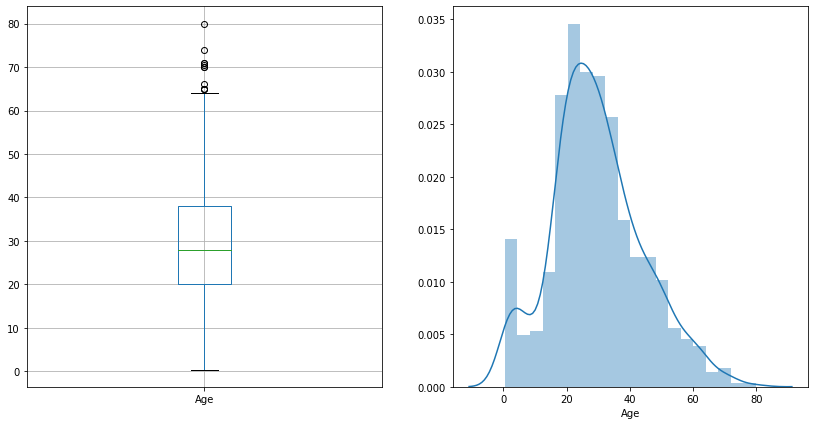

In [12]:
axis, fig=plt.subplots(1,2,figsize=(14,7))
plt.subplot(121)             
train.boxplot(column='Age')
plt.subplot(122)
sns.distplot(train.Age)
plt.show()

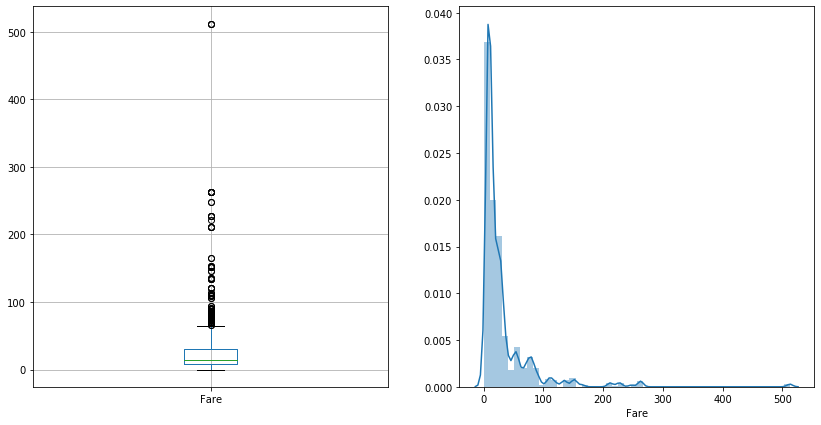

In [13]:
axis, fig=plt.subplots(1,2,figsize=(14,7))
plt.subplot(121)             
train.boxplot(column='Fare')
plt.subplot(122)
sns.distplot(train.Fare)
plt.show()

In [14]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [15]:
#train.loc[train['Cabin'].str.startswith('C'), 'Cabin']

In [16]:
train.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

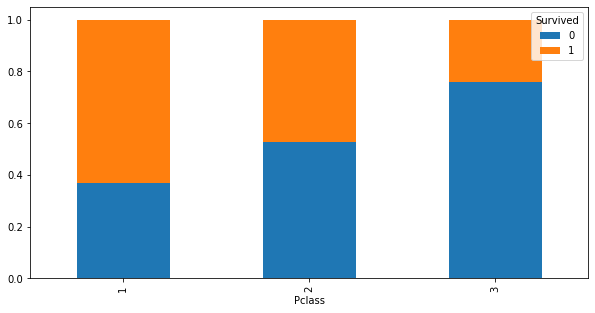

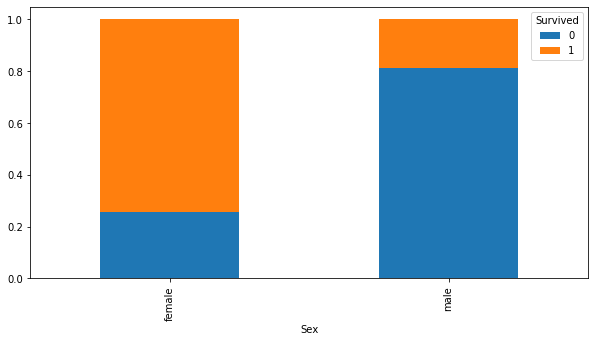

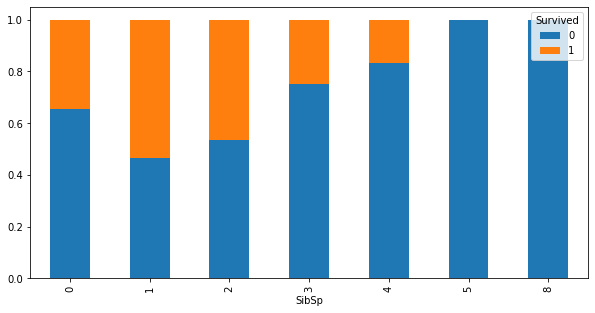

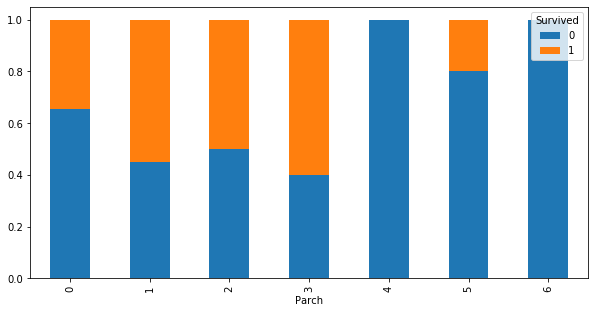

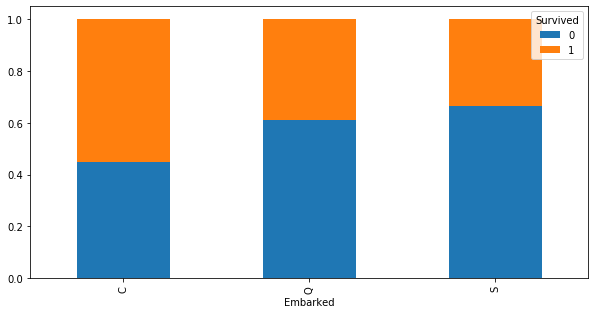

In [17]:
def plot(x):
    X=pd.crosstab(x,train.Survived).div(pd.crosstab(x,train.Survived).sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10, 5))
    return X
lst=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for name in lst:
    plot(train[str(name)])
    plt.show()

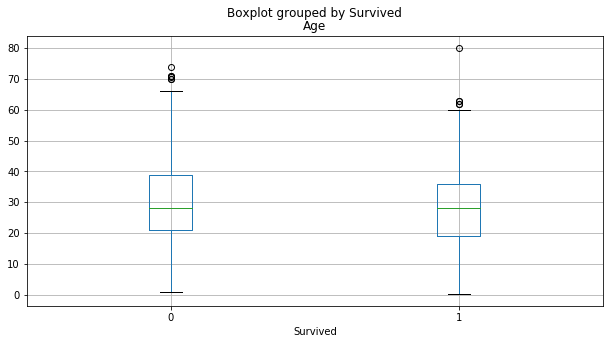

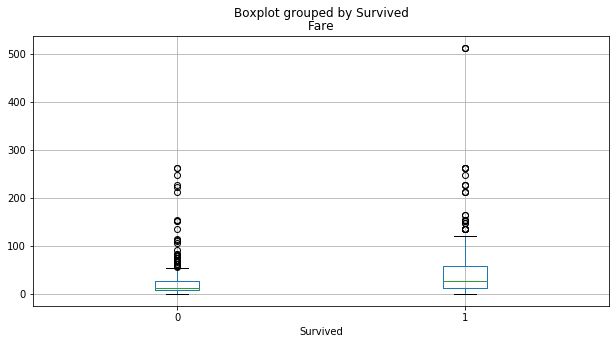

In [18]:
def boxplot(x):
    X=train.boxplot(column=x, by='Survived', figsize=(10,5))
    return X
lst2=['Age', 'Fare']
for name in lst2:
    boxplot(str(name))
    plt.show()

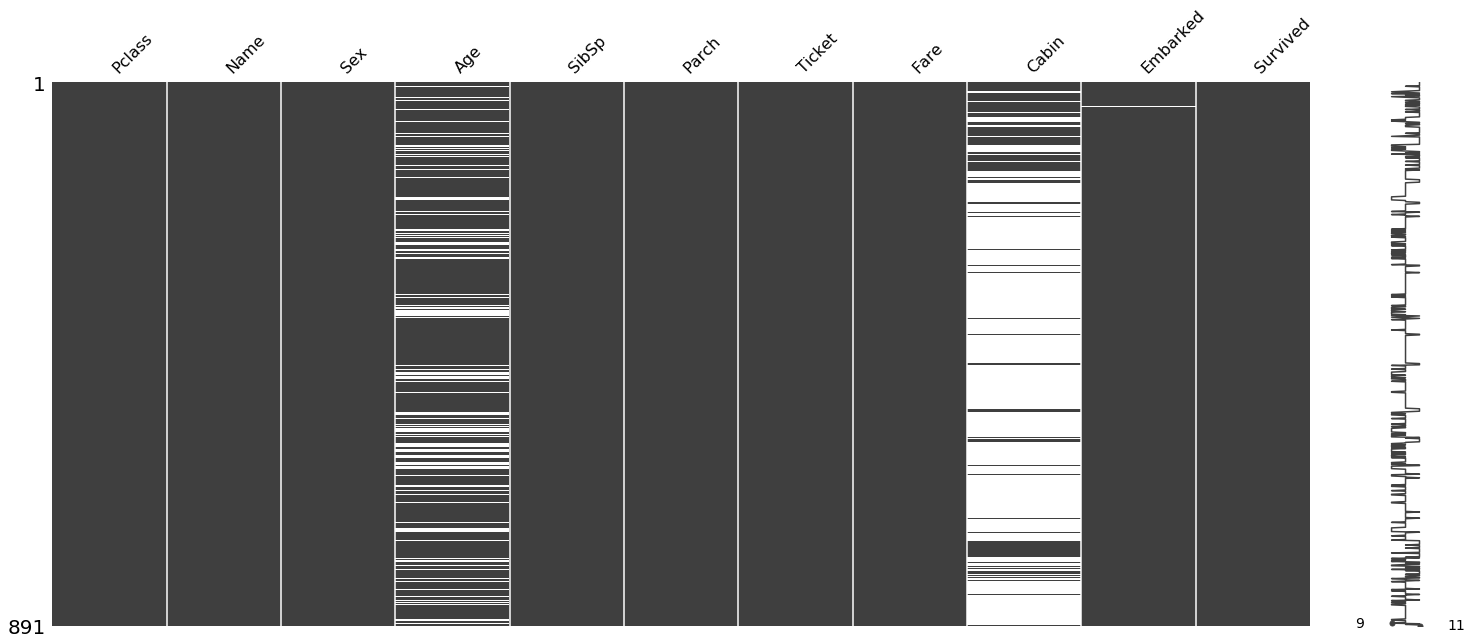

In [19]:
import missingno as msno
msno.matrix(train.sort_values(by='Ticket'))

In [20]:
#treating missing values for Age column using mean of values.
train['Age']=train.Age.fillna(train.groupby(['Pclass', 'Sex'])['Age'].transform('median'))
train['Embarked']=train.Embarked.fillna(train.Embarked.mode()[0])

In [21]:
test['Age']=test.Age.fillna(test.groupby(['Pclass', 'Sex'])['Age'].transform('median'))
test['Embarked']=test.Embarked.fillna(test.Embarked.mode()[0])
test['Fare']=test.Fare.fillna(test.groupby(['Pclass', 'Embarked'])['Fare'].transform('mean'))

In [22]:
train['Cabin']=train.Cabin.apply(lambda x: str(x))
def cab(x):
    if x.startswith('A')==True:
        return 'A'
    elif x.startswith('B')==True:
        return 'B'
    elif x.startswith('C')==True:
        return 'C'
    elif x.startswith('D')==True:
        return 'D'
    elif x.startswith('E')==True:
        return 'E'
    elif x.startswith('F')==True:
        return 'F'
    elif x.startswith('G')==True:
        return 'G'
    elif x.startswith('T')==True:
        return 'T'

train['Deck']=train.Cabin.apply(lambda x: cab(x))
train.drop(['Cabin'], axis=1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Deck
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,None
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,None
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,C
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,None
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,None
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,B
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,S,0,None


In [23]:
test['Cabin']=test.Cabin.apply(lambda x: str(x))
def cab(x):
    if x.startswith('A')==True:
        return 'A'
    elif x.startswith('B')==True:
        return 'B'
    elif x.startswith('C')==True:
        return 'C'
    elif x.startswith('D')==True:
        return 'D'
    elif x.startswith('E')==True:
        return 'E'
    elif x.startswith('F')==True:
        return 'F'
    elif x.startswith('G')==True:
        return 'G'
    elif x.startswith('T')==True:
        return 'T'

test['Deck']=test.Cabin.apply(lambda x: cab(x))
test.drop(['Cabin'], axis=1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,None
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,None
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,None
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,None
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,None
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S,None
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,None


In [24]:
pd.pivot_table(train, columns='Deck', values=['Fare', 'Age'], aggfunc=np.mean)

Deck,A,B,C,D,E,F,G,T
Age,43.866667,35.063830,36.447797,38.939394,37.703125,20.461538,14.75000,45.0
Fare,39.623887,113.505764,100.151341,57.244576,46.026694,18.696792,13.58125,35.5


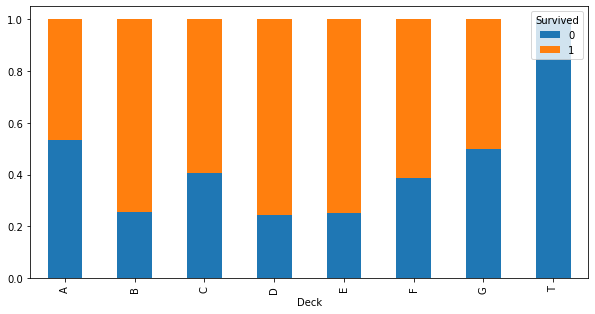

In [25]:
plot(train.Deck)

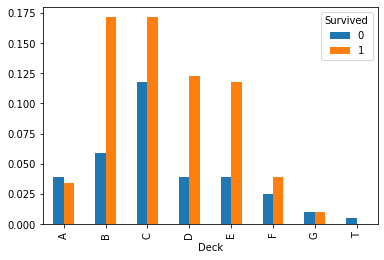

In [26]:
pd.crosstab(train.Deck, train.Survived, normalize=True).plot(kind='bar')

In [27]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [28]:
pd.pivot_table(train, columns='Pclass', values=['Fare', 'Age'], aggfunc=np.mean)

Pclass,1,2,3
Age,38.270463,29.863207,24.802281
Fare,84.154687,20.662183,13.675550


In [29]:
def farebin(x):
    if x<=13.5:
        return '3rd Class'
    elif 13.5<x<30:
        return '2nd Class'
    elif x>=30:
        return '1st Class'
train['Ticket_class']=train.Fare.apply(lambda x:farebin(x))

        

In [30]:
def farebin(x):
    if x<=13.5:
        return '3rd Class'
    elif 13.5<x<30:
        return '2nd Class'
    elif x>=30:
        return '1st Class'
test['Ticket_class']=test.Fare.apply(lambda x:farebin(x))


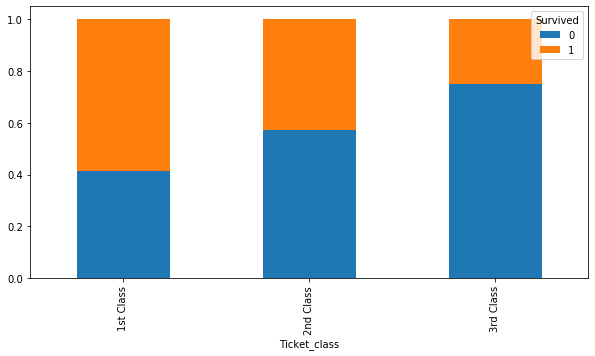

In [31]:
plot(train.Ticket_class)

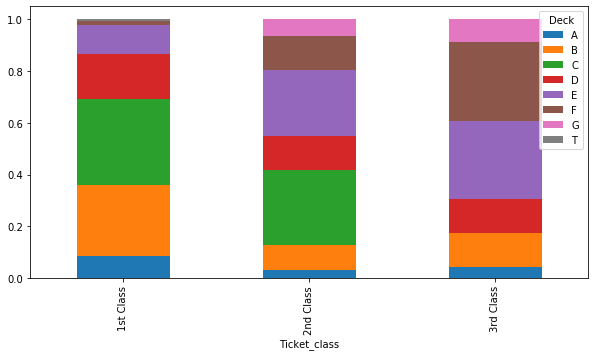

In [32]:
X=pd.crosstab(train.Ticket_class,train.Deck).div(pd.crosstab(train.Ticket_class,train.Deck).sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10, 5))

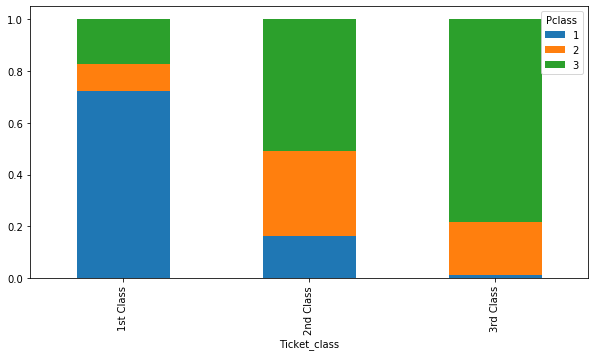

In [33]:
X=pd.crosstab(train.Ticket_class,train.Pclass).div(pd.crosstab(train.Ticket_class,train.Pclass).sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10, 5))

In [34]:
pd.pivot_table(train, index=['Pclass', 'Ticket_class', 'Deck'], aggfunc=np.mean)

Age        Fare     Parch     SibSp  Survived
Pclass Ticket_class Deck                                                     
1      1st Class    A     44.538462   43.719869  0.153846  0.153846  0.538462
                    B     33.853659  127.946344  0.658537  0.414634  0.829268
                    C     35.198400  113.167332  0.540000  0.760000  0.640000
                    D     40.000000   67.625485  0.307692  0.538462  0.730769
                    E     37.470588   69.589218  0.470588  0.588235  0.705882
                    T     45.000000   35.500000  0.000000  0.000000  0.000000
       2nd Class    A     40.000000   26.000000  0.000000  0.000000  0.000000
                    B     49.000000   27.990267  0.000000  0.000000  0.333333
                    C     43.388889   27.840278  0.111111  0.000000  0.333333
                    D     38.666667   26.047233  0.666667  0.000000  1.000000
                    E     45.000000   26.310938  0.000000  0.000000  0.750000
       3rd Class    A     39.000000    0.000000  0.000000  0.000000  0.000000
                    B     37.666667    1.666667  0.000000  0.000000  0.000000
2      1st Class    F      2.500000   39.000000  1.000000  2.000000  1.000000
       2nd Class    D     23.000000   13.791700  0.000000  0.000000  1.000000
                    F     13.833333   26.000000  1.333333  0.666667  0.666667
       3rd Class    D     35.333333   12.958333  0.000000  0.000000  0.666667
                    E     36.125000   11.587500  0.000000  0.000000  0.750000
                    F     29.000000   11.333333  0.000000  0.000000  1.000000
3      2nd Class    F     21.500000   22.358300  1.000000  1.000000  1.000000
                    G     14.000000   16.700000  1.500000  0.500000  1.000000
       3rd Class    E     21.666667   11.000000  0.666667  0.000000  1.000000
                    F     27.750000    7.675000  0.000000  0.000000  0.000000
                    G     15.500000   10.462500  1.000000  0.500000  0.000000

In [35]:
mapping={'1st Class':'1', 
        '2nd Class':'2', 
        '3rd Class':'3'}
train['Ticket_class']=train.Ticket_class.map(mapping)
train['Rank']=train.Ticket_class+train.Pclass.astype('str')
mapping={'11':1, '12':2, '13':3, '21':4, '22':5, '23':6, '31':7, '32':8, '33':9}
train['Rank']=train.Rank.map(mapping)

In [36]:
mapping={'1st Class':'1', 
        '2nd Class':'2', 
        '3rd Class':'3'}
test['Ticket_class']=test.Ticket_class.map(mapping)
test['Rank']=test.Ticket_class+test.Pclass.astype('str')
mapping={'11':1, '12':2, '13':3, '21':4, '22':5, '23':6, '31':7, '32':8, '33':9}
test['Rank']=test.Rank.map(mapping)

In [37]:
pd.crosstab(train.Rank, train.Deck, normalize=True)


Deck,A,B,C,D,E,F,G,T
Rank,,,,,,,,
1,0.063725,0.200980,0.245098,0.127451,0.083333,0.000000,0.000000,0.004902
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.009804,0.000000,0.000000
4,0.004902,0.014706,0.044118,0.014706,0.039216,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.004902,0.000000,0.014706,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.004902,0.009804,0.000000
7,0.004902,0.014706,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.014706,0.019608,0.014706,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.014706,0.019608,0.009804,0.000000


In [38]:
train['Rank']=train.Rank.astype('str')
train['prob']=train.Deck+train.Rank

In [39]:
test['Rank']=test.Rank.astype('str')
test['prob']=test.Deck+test.Rank

In [40]:
pd.crosstab(train.Rank, train.prob, normalize=True)

prob,A1,A4,A7,B1,B4,B7,C1,C4,D1,D4,...,E8,E9,F2,F5,F6,F8,F9,G6,G9,T1
Rank,,,,,,,,,,,,,,,,,,,,,
1,0.063725,0.000000,0.000000,0.20098,0.000000,0.000000,0.245098,0.000000,0.127451,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004902
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.009804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.004902,0.000000,0.00000,0.014706,0.000000,0.000000,0.044118,0.000000,0.014706,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.014706,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.004902,0.000000,0.000000,0.009804,0.000000,0.000000
7,0.000000,0.000000,0.004902,0.00000,0.000000,0.014706,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.019608,0.000000,0.000000,0.000000,0.000000,0.014706,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.014706,0.000000,0.000000,0.000000,0.000000,0.019608,0.000000,0.009804,0.000000


In [41]:
df=pd.crosstab(train.Rank, train.prob, normalize=True)
na_index=train.index.values[train['prob'].isnull()]
c=[]
lst2=df.keys()
for name in df.keys()[:]:
    c.append(df[str(name)].values)
    
lst=[]
for i in c:
    for j in i:
        if j>0:
            lst.append(j)
na_serie=pd.Series(np.random.choice(lst2, p=lst, size=len(na_index)), index=na_index) 
train.prob.fillna(na_serie, inplace=True)

In [42]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Ticket_class,Rank,prob
PassengerId,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,nan,Q,None,3,9,NaN
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,nan,S,None,3,9,NaN
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,nan,Q,None,3,8,NaN
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,nan,S,None,3,9,NaN
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,nan,S,None,3,9,NaN


In [43]:
df=pd.crosstab(test.Rank, test.prob, normalize=True)
na_index=test.index.values[test['prob'].isnull()]
c=[]
lst2=df.keys()
for name in df.keys()[:]:
    c.append(df[str(name)].values)
    
lst=[]
for i in c:
    for j in i:
        if j>0:
            lst.append(j)
na_serie=pd.Series(np.random.choice(lst2, p=lst, size=len(na_index)), index=na_index) 
test.prob.fillna(na_serie, inplace=True)

In [44]:
train['Deck']=train.prob.apply(lambda x: cab(x))
test['Deck']=test.prob.apply(lambda x: cab(x))

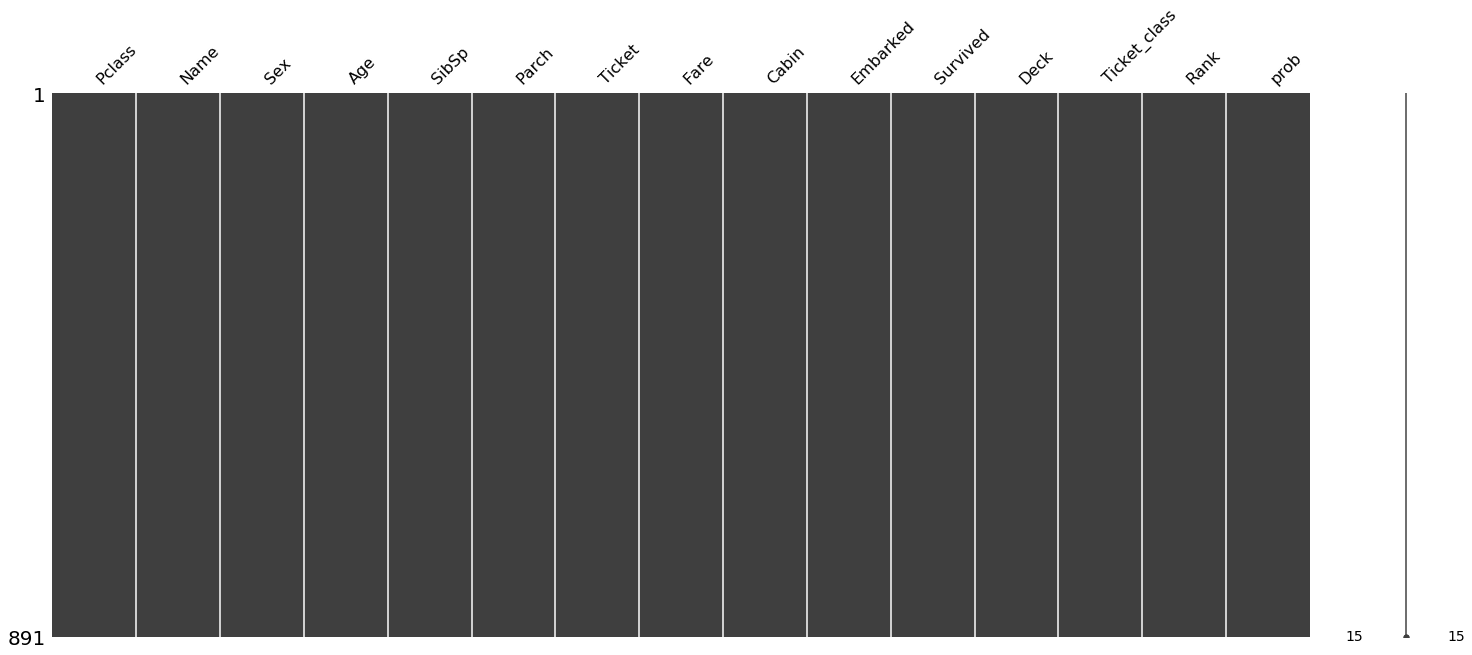

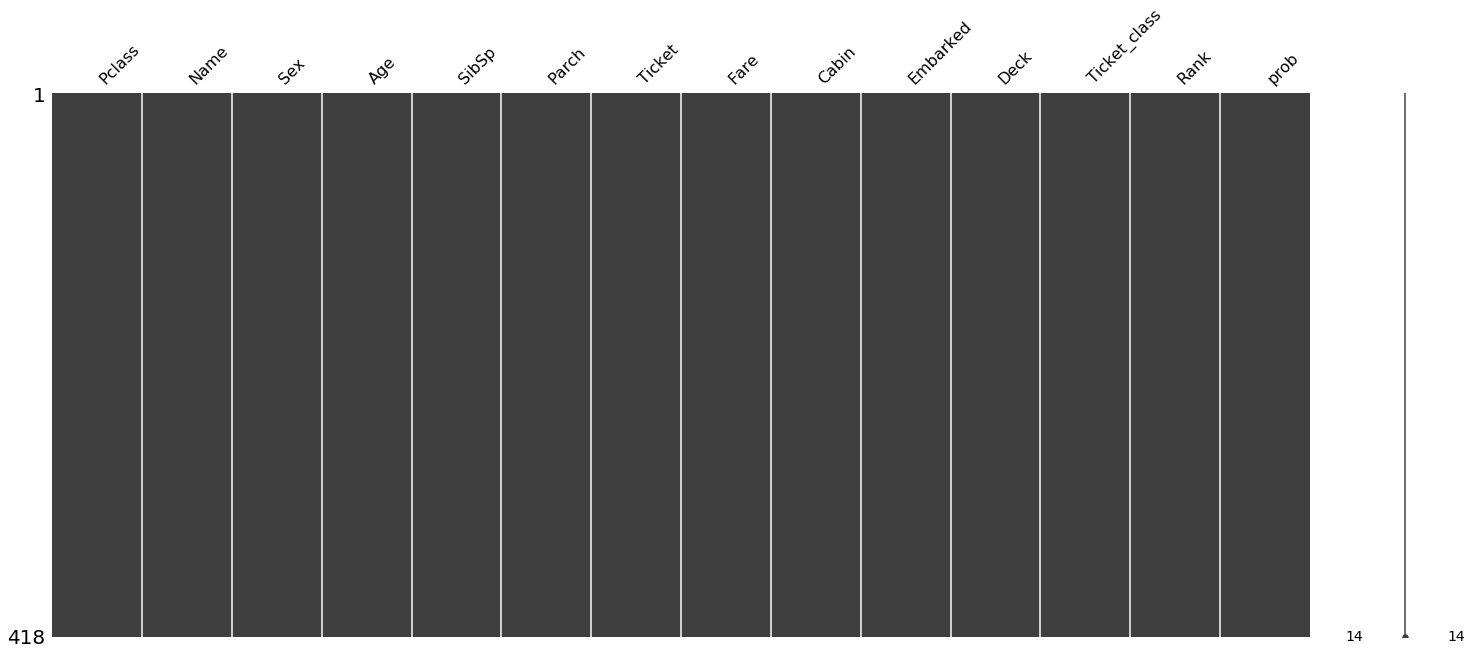

In [45]:
msno.matrix(train),
msno.matrix(test)

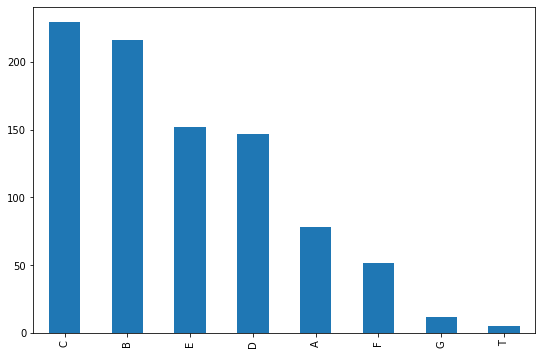

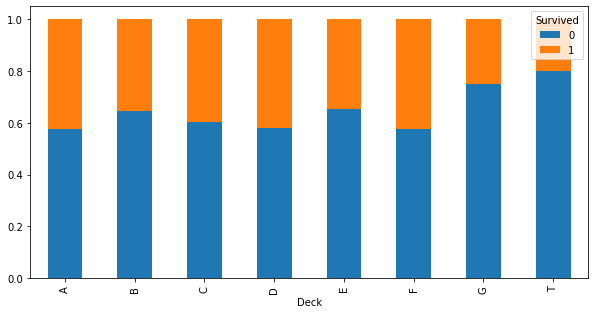

In [46]:
train.Deck.value_counts().plot(kind='bar', figsize=(9,6))
plot(train.Deck)

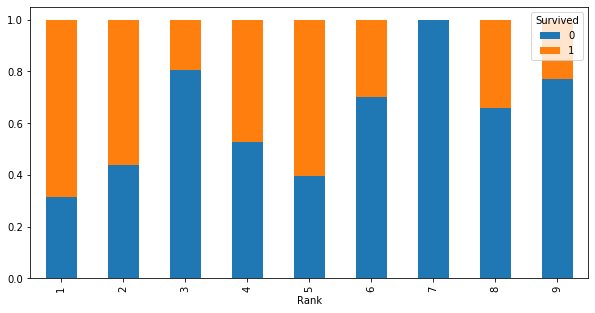

In [47]:
plot(train.Rank)

In [48]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Deck,Ticket_class,Rank,prob
PassengerId,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,nan,S,0,C,3,9,C1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,1,1,C1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,nan,S,1,C,3,9,C1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,1,1,C1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,nan,S,0,C,3,9,C4


In [49]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [50]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [51]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

train['Title'] = train['Title'].map(title_mapping)
train['Title'] = train['Title'].fillna(0)

In [52]:
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')
    
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

test['Title'] = test['Title'].map(title_mapping)
test['Title'] = test['Title'].fillna(0)

In [53]:
train.Age.describe()

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [54]:

def agebin(x):
    if 0<x<=3:
        return 'Infant/Toddler'
    elif 3<x<=5:
        return 'Young Child'
    elif 5<x<=13:
        return 'Child'
    elif 13<x<=17:
        return 'Teenager'
    elif 17<x<=35:
        return 'Adult'
    elif 35<x<=60:
        return 'Middle Age'
    elif x>60 :
        return 'Elderly'

train['Age_bin']=train.Age.apply(lambda x: agebin(x))

In [55]:
test['Age_bin']=test.Age.apply(lambda x: agebin(x))

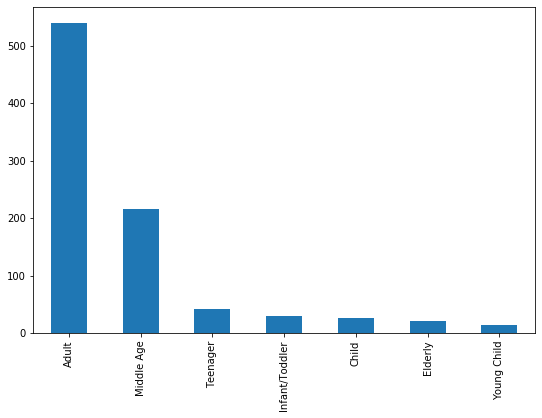

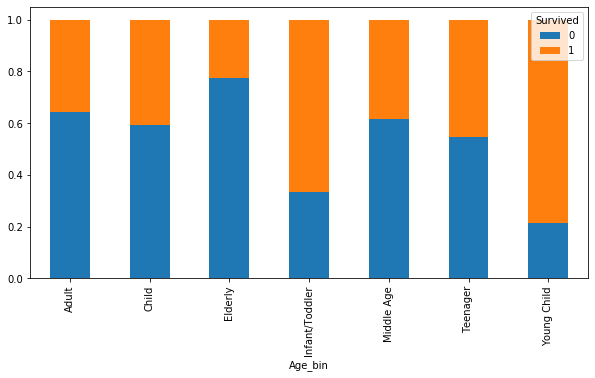

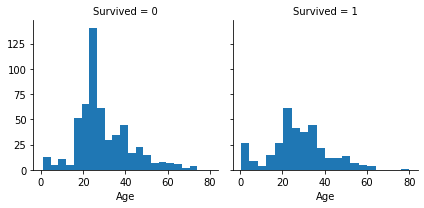

In [56]:

train.Age_bin.value_counts().plot(kind='bar', figsize=(9,6))
plot(train.Age_bin)
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)


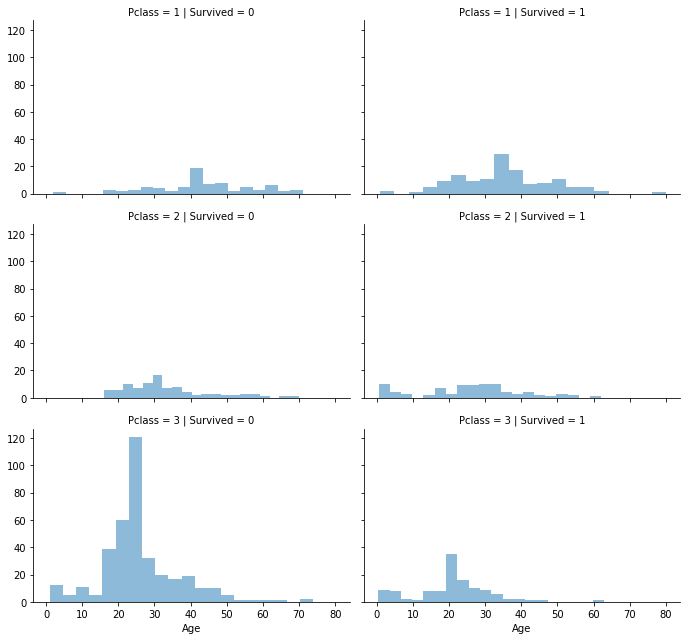

In [57]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=3, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [58]:
train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived', 'Deck', 'Ticket_class', 'Rank', 'prob',
       'Title', 'Age_bin'],
      dtype='object')

In [59]:
train.groupby(['Embarked']).mean()

,Pclass,Age,SibSp,Parch,Fare,Survived,Title
Embarked,,,,,,,
C,1.886905,30.246548,0.386905,0.363095,59.954144,0.553571,1.851190
Q,2.909091,25.116883,0.428571,0.168831,13.276030,0.389610,1.766234
S,2.346749,29.293731,0.569659,0.411765,27.243651,0.339009,1.691950


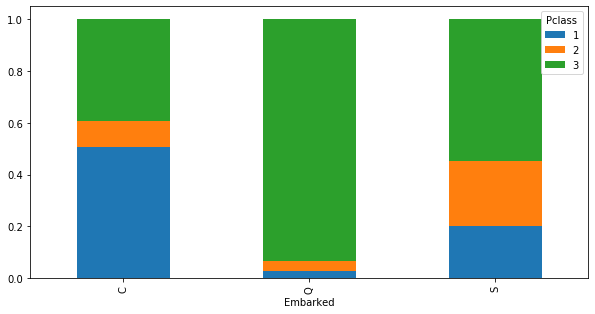

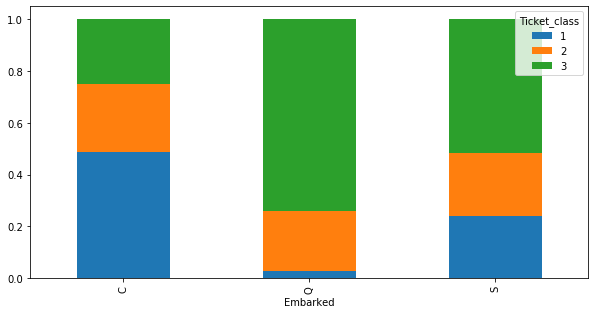

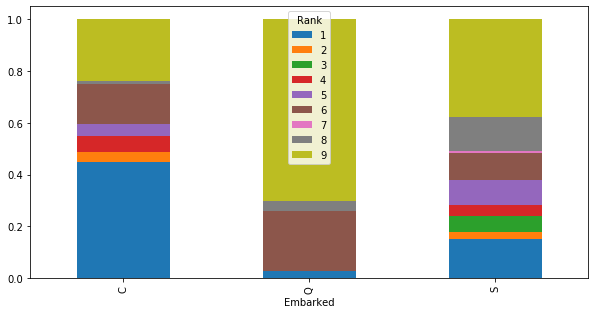

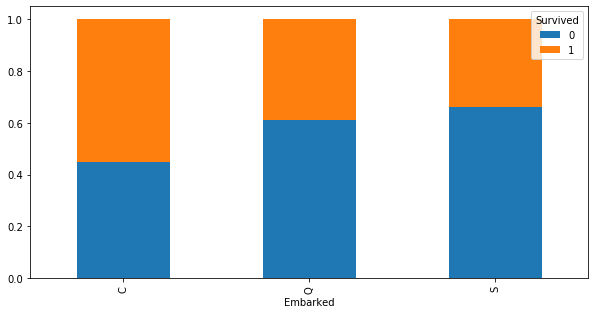

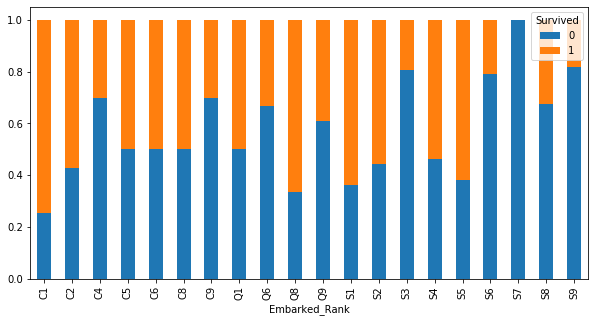

In [60]:
pd.crosstab(train.Embarked, train.Pclass).div(pd.crosstab(train.Embarked, train.Pclass).sum(1).astype(float), axis=0).plot(kind='bar',
                                                                                                             stacked=True, 
                                                                                                                figsize=(10,5))
pd.crosstab(train.Embarked, train.Ticket_class).div(pd.crosstab(train.Embarked, train.Ticket_class).sum(1).astype(float), axis=0).plot(kind='bar',
                                                                                                             stacked=True, 
                                                                                                                figsize=(10,5))
pd.crosstab(train.Embarked, train.Rank).div(pd.crosstab(train.Embarked, train.Ticket_class).sum(1).astype(float), axis=0).plot(kind='bar',
                                                                                                             stacked=True, 
                                                                                                                figsize=(10,5))
pd.crosstab(train.Embarked, train.Survived).div(pd.crosstab(train.Embarked, train.Survived).sum(1).astype(float), axis=0).plot(kind='bar',
                                                                                                             stacked=True, 
                                                                                                                figsize=(10,5))
train['Embarked_Rank']=train['Embarked']+train.Rank.astype('str')
test['Embarked_Rank']=test['Embarked']+test.Rank.astype('str')
pd.crosstab(train.Embarked_Rank, train.Survived).div(pd.crosstab(train.Embarked_Rank, train.Survived).sum(1).astype(float), 
                                                     axis=0).plot(kind='bar', stacked=True, figsize=(10,5))

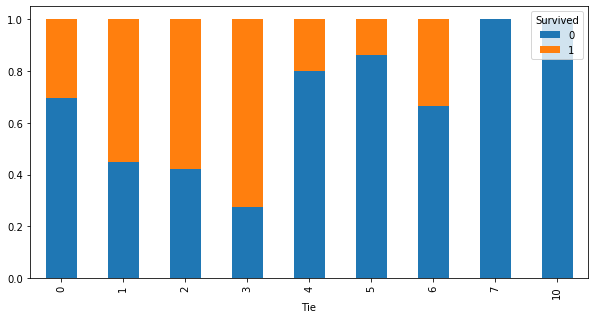

In [61]:
train['Tie']=train.SibSp+train.Parch
test['Tie']=test.SibSp+test.Parch
pd.crosstab(train.Tie, train.Survived).div(pd.crosstab(train.Tie, train.Survived).sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(10,5))
def alone(x):
    if x==0:
        return 0
    else:
        return 1
train['Tie']=train.Tie.apply(lambda x: alone(x))
test['Tie']=test.Tie.apply(lambda x: alone(x))

In [62]:
train['Sex_tie']=train.Sex+train.Tie.astype('str')
test['Sex_tie']=test.Sex+test.Tie.astype('str')


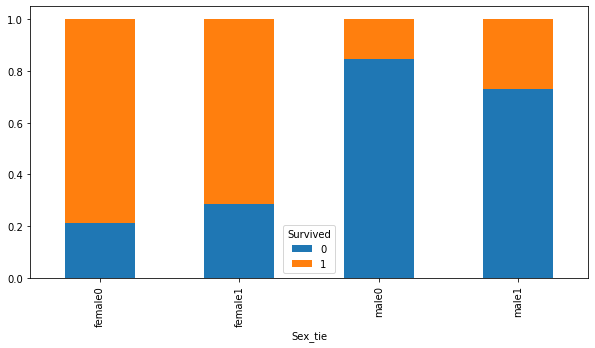

In [63]:
plot(train.Sex_tie)

In [64]:
mapping={'male1':0, 'female1':1, 'female0':2, 'male0':3}
train['Sex_tie']=train.Sex_tie.map(mapping)
test['Sex_tie']=test.Sex_tie.map(mapping)


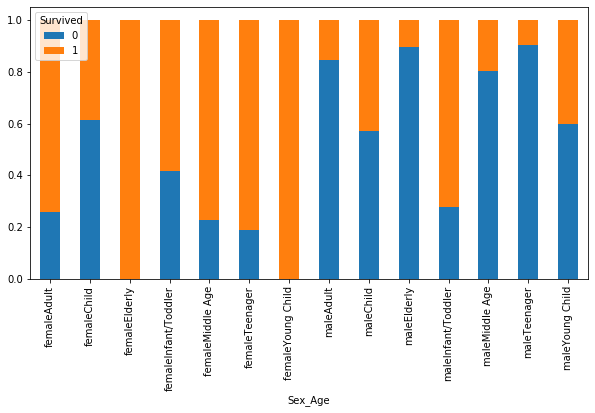

In [65]:
train['Sex_Age']=train.Sex+train.Age_bin
test['Sex_Age']=test.Sex+test.Age_bin
plot(train.Sex_Age)

In [66]:
def dict_map(column,df):
    dict={}
    i=0
    for x in df[column].unique():
        dict[x]=i
        i+=1
    return dict

In [67]:
mapping=dict_map('Sex_Age', train)
train['Sex_Age']=train.Sex_Age.map(mapping)
test['Sex_Age']=test.Sex_Age.map(mapping)

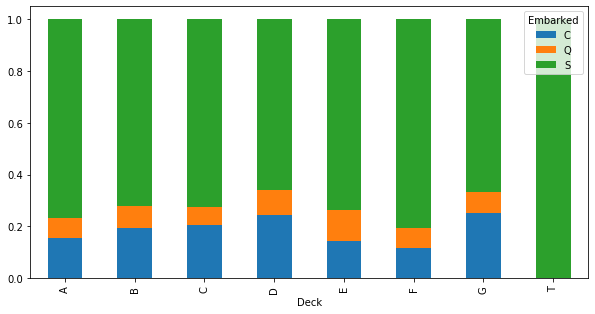

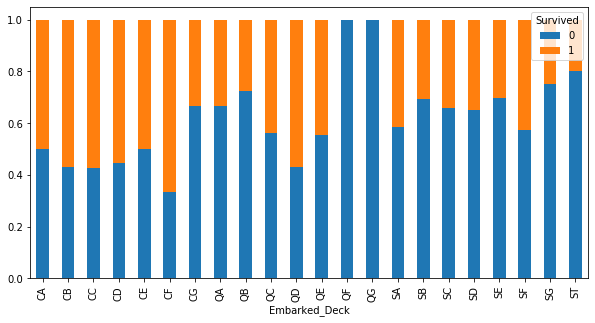

In [68]:
pd.crosstab(train.Deck, train.Embarked).div(pd.crosstab(train.Deck, train.Embarked).sum(1).astype(float), 
                                                     axis=0).plot(kind='bar', stacked=True, figsize=(10,5))
train['Embarked_Deck']=train.Embarked+train.Deck
test['Embarked_Deck']=test.Embarked+test.Deck
plot(train.Embarked_Deck)

In [69]:
mapping={'C': 1, 'T': 8, 'B': 2, 'E': 7, 'G': 6, 'D': 5, 'A': 3, 'F': 5}
train['Deck']=train.Deck.map(mapping)
test['Deck']=test.Deck.map(mapping)

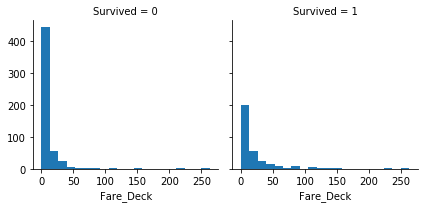

In [70]:
train['Fare_Deck']=train.Fare/train.Deck
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare_Deck', bins=20)
test['Fare_Deck']=test.Fare/test.Deck

In [71]:
train.Fare_Deck.describe()

count    891.000000
mean      17.455448
std       35.453992
min        0.000000
25%        2.600000
50%        6.500000
75%       14.925000
max      263.000000
Name: Fare_Deck, dtype: float64

In [72]:
#train['Fare_Deck_log']=np.log(train.Fare_Deck+0.000000001)
#train['Fare_Deck_sqrt']=np.sqrt(train.Fare_Deck)
#train['Fare_Deck'] = pd.qcut(train['Fare_Deck'], 4)
#train[['Fare_Deck', 'Survived']].groupby(['Fare_Deck'], as_index=False).mean().sort_values(by='Fare_Deck', ascending=True)

In [73]:
def faredeckbin(x):
    if x<=2.6:
        return 1
    elif 2.6<x<=14.7:
        return 2
    elif x>14.7:
        return 3
train["Fare_Deck"]=train.Fare_Deck.apply(lambda x:faredeckbin(x))

In [94]:
def faredeckbin(x):
    if x<=2.6:
        return 1
    elif 2.6<x<=14.7:
        return 2
    elif x>14.7:
        return 3
test["Fare_Deck"]=test.Fare_Deck.apply(lambda x:faredeckbin(x))

In [74]:
#test['Fare_Deck_sqrt']=np.sqrt(test.Fare_Deck)

In [75]:
#train.Fare_Deck_sqrt.describe()

In [76]:
#train=train.drop(['Fare_Deck_log'], axis=1)

In [77]:
#mapping={'Adult':4, 'Middle Age':5, 'Infant/Toddler':0, 'Teenager':3, 'Young Child':1,
      # 'Child':2, 'Elderly':6}
#train['Age_bin']=train.Age_bin.map(mapping)
#test['Age_bin']=test.Age_bin.map(mapping)

In [78]:
mapping=dict_map('Embarked_Rank', train)
train['Embarked_Rank']=train.Embarked_Rank.map(mapping)
test['Embarked_Rank']=test.Embarked_Rank.map(mapping)

In [98]:
train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived', 'Deck', 'Ticket_class', 'Rank', 'prob',
       'Title', 'Age_bin', 'Embarked_Rank', 'Tie', 'Sex_tie', 'Sex_Age',
       'Embarked_Deck', 'Fare_Deck'],
      dtype='object')

In [80]:
X=train.drop(['Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Pclass', 'Ticket_class'
, 'prob', 'Embarked_Deck', 'Tie', 'Age_bin', 'Rank', 'Survived' ],axis=1)
y=train['Survived']
X.columns

Index(['Deck', 'Title', 'Embarked_Rank', 'Sex_tie', 'Sex_Age', 'Fare_Deck'], dtype='object')

In [81]:
test=test.drop(['Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Pclass', 'Ticket_class'
, 'prob', 'Embarked_Deck', 'Tie', 'Age_bin', 'Rank'],axis=1)

In [95]:
test.head()

,Deck,Title,Embarked_Rank,Sex_tie,Sex_Age,Fare_Deck
PassengerId,,,,,,
892,5,1,3,3,0,1
893,1,3,0,1,1,2
894,2,1,19,3,8,2
895,1,1,0,3,0,2
896,1,3,0,1,2,2


In [83]:
X

,Deck,Title,Embarked_Rank,Sex_tie,Sex_Age,Fare_Deck
PassengerId,,,,,,
1,1,1,0,0,0,2
2,1,3,1,1,1,3
3,1,2,0,2,2,2
4,1,3,2,1,2,3
5,1,1,0,3,0,2
...,...,...,...,...,...,...
887,2,5,10,3,0,2
888,2,2,2,2,2,3
889,2,2,4,1,2,2


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [102]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X, y) * 100, 2)
acc_log


73.85

In [103]:
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Title,0.808919
5,Fare_Deck,0.775703
0,Deck,0.155343
2,Embarked_Rank,-0.005437
3,Sex_tie,-0.014257
4,Sex_Age,-0.024305


In [85]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=1)
param_lr={'penalty':['l1', 'l2'],
         'C': [1.0, 0.5, 0.1], 
         }
grid_lr=GridSearchCV(estimator=LogisticRegression(), param_grid=param_lr, scoring='accuracy', cv=5)
grid_lr.fit(X_train, y_train)
print('best score:', grid_lr.best_score_)
print('best params:', grid_lr.best_params_)
print('best estimator:', grid_lr.best_estimator_)

best score: 0.751453260015711
best params: {'C': 0.5, 'penalty': 'l2'}
best estimator: LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [96]:
mean_score=[]
i=1 
kf= StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]     
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]         
    model = LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test) 
    print('score:', score)
    mean_score.append(score)
    i+=1 

print('mean of accuracy scores:', np.mean(mean_score))
y_pred = model.predict(X_test) 
print('Accuracy score:' ,accuracy_score(y_test, y_pred))


1 of kfold 5
score: 0.7597765363128491

2 of kfold 5
score: 0.7191011235955056

3 of kfold 5
score: 0.7303370786516854

4 of kfold 5
score: 0.7134831460674157

5 of kfold 5
score: 0.7584269662921348
mean of accuracy scores: 0.7362249701839181
Accuracy score: 0.6995515695067265


In [87]:
from sklearn.tree import DecisionTreeClassifier
mean_score=[]
i=1 
kf= StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]     
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]         
    model = DecisionTreeClassifier()
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test) 
    print('score:', score)
    mean_score.append(score)
    i+=1 

print('mean of accuracy scores:', np.mean(mean_score))
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
print('Accuracy score:' ,accuracy_score(y_test, y_pred))


1 of kfold 5
score: 0.770949720670391

2 of kfold 5
score: 0.8426966292134831

3 of kfold 5
score: 0.7696629213483146

4 of kfold 5
score: 0.7865168539325843

5 of kfold 5
score: 0.797752808988764
mean of accuracy scores: 0.7935157868307073
Accuracy score: 0.7399103139013453


In [88]:
from sklearn.ensemble import RandomForestClassifier
mean_score=[]
i=1 
kf= StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]     
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]         
    model = RandomForestClassifier()
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test) 
    print('score:', score)
    mean_score.append(score)
    i+=1 

print('mean of accuracy scores:', np.mean(mean_score))
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
print('Accuracy score:' ,accuracy_score(y_test, y_pred))


1 of kfold 5
score: 0.7821229050279329

2 of kfold 5
score: 0.8539325842696629

3 of kfold 5
score: 0.7921348314606742

4 of kfold 5
score: 0.8202247191011236

5 of kfold 5
score: 0.7865168539325843
mean of accuracy scores: 0.8069863787583955
Accuracy score: 0.7937219730941704


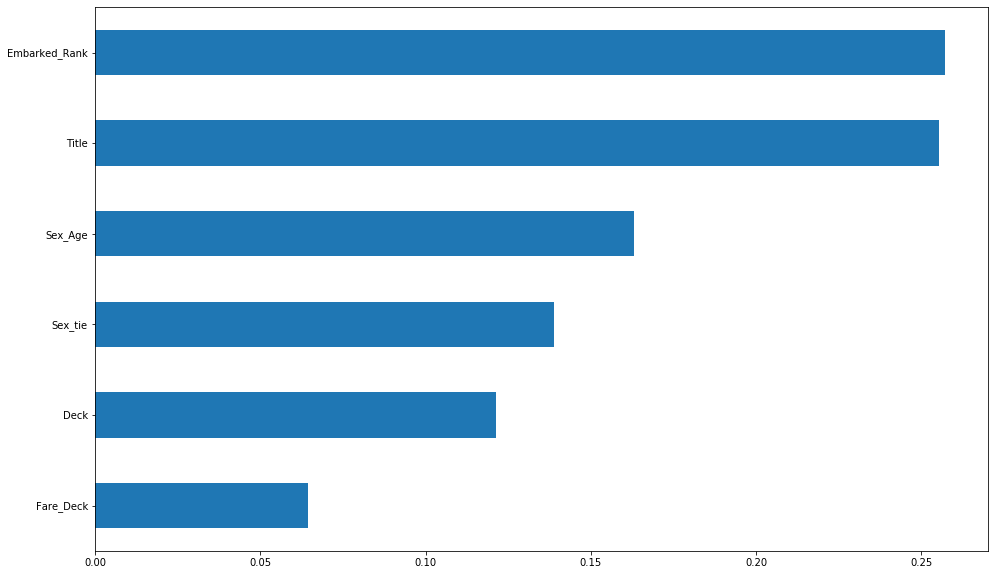

In [89]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(16, 10))

In [90]:
from xgboost import XGBClassifier
mean_score=[]
i=1 
kf= StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]     
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]         
    model = XGBClassifier()
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test) 
    print('score:', score)
    mean_score.append(score)
    i+=1 

print('mean of accuracy scores:', np.mean(mean_score))
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
print('Accuracy score:' ,accuracy_score(y_test, y_pred))


1 of kfold 5
score: 0.7988826815642458

2 of kfold 5
score: 0.8539325842696629

3 of kfold 5
score: 0.797752808988764

4 of kfold 5
score: 0.8089887640449438

5 of kfold 5
score: 0.8202247191011236
mean of accuracy scores: 0.815956311593748
Accuracy score: 0.7802690582959642


In [91]:
params={'max_depth':list(range(1,20, 2)), 'eta': [0.1, 0.2, 0.3, 0.4, 0.5], 'gamma':[0.5, 1, 2]}
from xgboost import XGBClassifier
xgb=XGBClassifier(learning_rate=0.02)
grid_xgb=GridSearchCV(xgb,params, cv=3)
grid_xgb.fit(X_train, y_train)
print('best params:', grid_xgb.best_params_)
print('best score:', grid_xgb.best_score_ )

best params: {'eta': 0.1, 'gamma': 2, 'max_depth': 9}
best score: 0.8188771731372628


In [92]:
print('best estimators:', grid_xgb.best_estimator_)

best estimators: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=2,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [93]:
from sklearn.ensemble import AdaBoostClassifier
mean_score=[]
i=1 
kf= StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]     
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]         
    model = AdaBoostClassifier()
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test) 
    print('score:', score)
    mean_score.append(score)
    i+=1 

print('mean of accuracy scores:', np.mean(mean_score))
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
print('Accuracy score:' ,accuracy_score(y_test, y_pred))


1 of kfold 5
score: 0.8379888268156425

2 of kfold 5
score: 0.7808988764044944

3 of kfold 5
score: 0.8033707865168539

4 of kfold 5
score: 0.7528089887640449

5 of kfold 5
score: 0.8258426966292135
mean of accuracy scores: 0.8001820350260498
Accuracy score: 0.7802690582959642
